In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [3]:
number_of_runs=5
significance_level=1.96  # for 95 ci
height = 6
font_size=11
rotation_degree = 15

In [4]:
base_directory="./TPR_GAPS/"

In [5]:
seed_19_sex = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.592849,0.021801,0.407151,-0.021801
1,Cardiomegaly,0.597661,0.023391,0.402339,-0.023391
2,Lung Opacity,0.591312,0.018575,0.408688,-0.018575
3,Lung Lesion,0.605098,0.012155,0.394902,-0.012155
4,Edema,0.593268,0.028918,0.406732,-0.028918


In [6]:
seed_19_age = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.412294,0.015349,0.276497,0.000000,0.095942,-0.010051,0.208919,0.027134,0.006348,-0.045534
1,Cardiomegaly,0.414511,0.000000,0.271681,-0.019404,0.089197,-0.021647,0.218144,0.016532,0.006466,0.001211
2,Lung Opacity,0.413506,0.022195,0.282502,0.000000,0.103472,-0.022619,0.193867,0.012634,0.006653,-0.033832
3,Lung Lesion,0.407832,0.042548,0.288142,-0.001279,0.158478,0.037183,0.137052,0.000000,0.008496,-0.030822
4,Edema,0.416471,0.008259,0.267045,-0.010429,0.095673,0.000000,0.214523,0.012285,0.006288,-0.089676


In [7]:
seed_19_race = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.648855,-0.000949,0.064122,-0.027890,0.027160,0.031534,0.136681,0.003717,0.109200,0.000949,0.013982,-0.073003
1,Cardiomegaly,0.646634,0.004803,0.067041,-0.026368,0.026721,0.024393,0.136078,-0.004803,0.109833,0.014564,0.013693,-0.063809
2,Lung Opacity,0.651117,0.001966,0.061869,-0.052364,0.026614,0.012666,0.135057,0.000430,0.113567,-0.000430,0.011777,-0.025250


In [8]:
diseases = ['Enlarged Cardiomediastinum','Cardiomegaly','Lung Opacity','Lung Lesion','Edema',
        'Consolidation','Pneumonia','Atelectasis','Pneumothorax','Pleural Effusion','Pleural Other',
        'Fracture','Support Devices']

diseases_abbr = {'Cardiomegaly': 'Cardiomegaly',
                 'Effusion': 'Effusion',
                 'Enlarged Cardiomediastinum': 'Enlarged Card.',
                 'Lung Lesion': 'Lung Lesion',
                 'Atelectasis': 'Atelectasis',
                 'Pneumonia': 'Pneumonia',
                 'Pneumothorax': 'Pneumothorax',
                 'Consolidation': 'Consolidation',
                 'Edema': 'Edema',
                 'Pleural Effusion': 'Effusion',
                 'Pleural Other': 'Pleural Other',
                 'Fracture': 'Fracture',
                 'Support Devices': 'Sup. Devices',
                 'Lung Opacity': 'Air. Opacity'
                }

## 1. Gender

In [9]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)


In [10]:
result_sex_grouped = result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [11]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [12]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [13]:
for disease in diseases:
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [14]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
6,Pneumonia,Pneumonia,0.000845,0.584233,-0.000422,0.006907,0.415767,0.000422,0.006907
12,Support Devices,Sup. Devices,0.001386,0.605206,0.000693,0.002046,0.394794,-0.000693,0.002046
9,Pleural Effusion,Effusion,0.003353,0.595807,0.001676,0.004173,0.404193,-0.001676,0.004173
5,Consolidation,Consolidation,0.009182,0.588171,-0.004591,0.003633,0.411829,0.004591,0.003633
3,Lung Lesion,Lung Lesion,0.015857,0.605098,0.007929,0.005289,0.394902,-0.007929,0.005289
11,Fracture,Fracture,0.019850,0.580746,-0.009925,0.008293,0.419254,0.009925,0.008293
7,Atelectasis,Atelectasis,0.021818,0.596280,0.010909,0.003123,0.403720,-0.010909,0.003123
2,Lung Opacity,Air. Opacity,0.035203,0.591312,0.017602,0.003236,0.408688,-0.017602,0.003236
8,Pneumothorax,Pneumothorax,0.039017,0.575914,-0.019508,0.008856,0.424086,0.019508,0.008856
0,Enlarged Cardiomediastinum,Enlarged Card.,0.039389,0.592849,0.019694,0.001883,0.407151,-0.019694,0.001883


In [15]:
sex_tpr_disp_df.to_csv(base_directory+"sex_tpr_disp.csv")

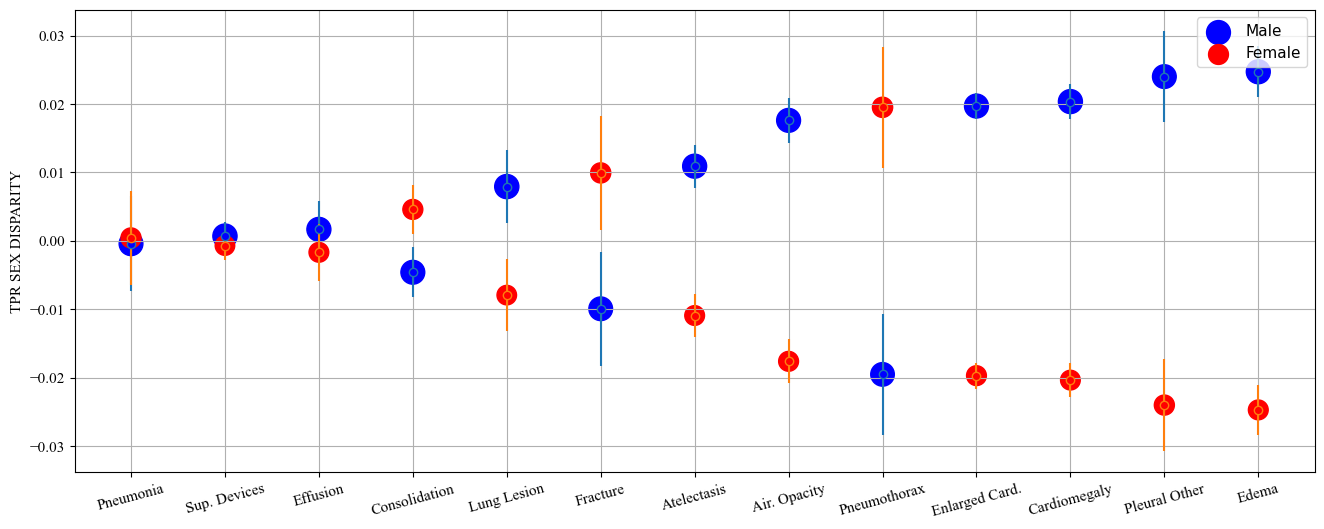

In [16]:

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))

plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')

plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_SEX.pdf")


## 2. Age

In [17]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [18]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [19]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [20]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [21]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [23]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [24]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [25]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [26]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [27]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv(base_directory+"age_tpr_disp.csv")

In [28]:
plt.rcParams.update({'font.size': font_size})

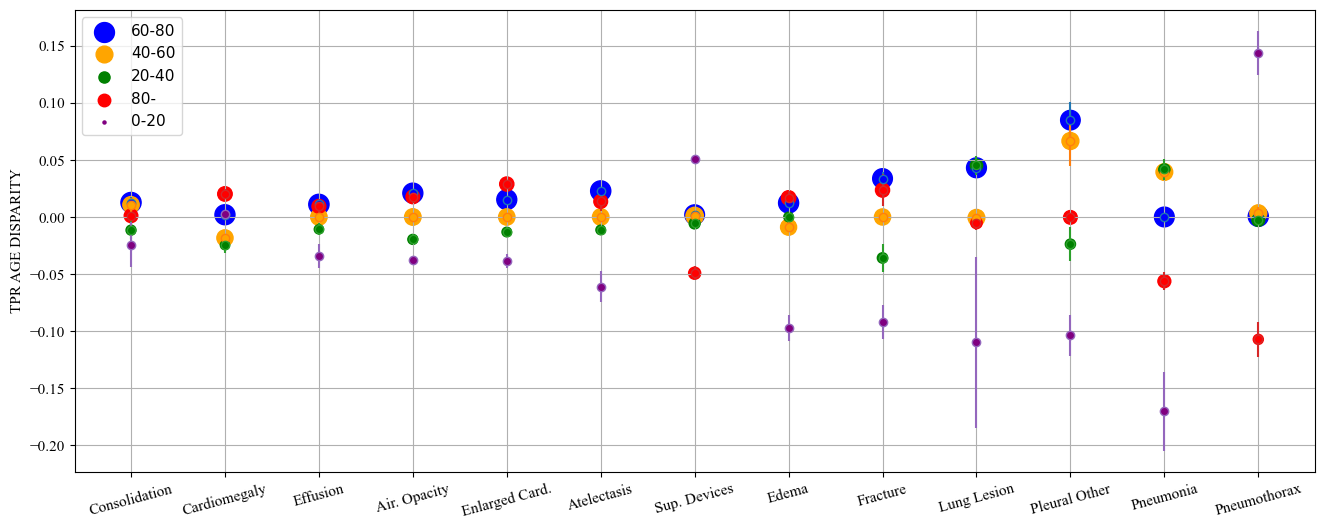

In [29]:
plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_AGE.pdf")

## 3. Race

In [30]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [31]:
result_race_grouped_stat

%White                                     \
                            count      mean  std       min       25%   
diseases                                                               
Atelectasis                   5.0  0.659027  0.0  0.659027  0.659027   
Cardiomegaly                  5.0  0.646634  0.0  0.646634  0.646634   
Consolidation                 5.0  0.663824  0.0  0.663824  0.663824   
Edema                         5.0  0.648379  0.0  0.648379  0.648379   
Enlarged Cardiomediastinum    5.0  0.648855  0.0  0.648855  0.648855   
Fracture                      5.0  0.651295  0.0  0.651295  0.651295   
Lung Lesion                   5.0  0.643886  0.0  0.643886  0.643886   
Lung Opacity                  5.0  0.651117  0.0  0.651117  0.651117   
No Finding                    5.0  0.586335  0.0  0.586335  0.586335   
Pleural Effusion              5.0  0.663097  0.0  0.663097  0.663097   
Pleural Other                 5.0  0.618189  0.0  0.618189  0.618189   
Pneumonia                     5.0  0.641901  0.0  0.641901  0.641901   
Pneumothorax                  5.0  0.717432  0.0  0.717432  0.717432   
Support Devices               5.0  0.668286  0.0  0.668286  0.668286   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.659027  0.659027  0.659027       5.0  0.021111   
Cardiomegaly                0.646634  0.646634  0.646634       5.0  0.005203   
Consolidation               0.663824  0.663824  0.663824       5.0 -0.003276   
Edema                       0.648379  0.648379  0.648379       5.0  0.017843   
Enlarged Cardiomediastinum  0.648855  0.648855  0.648855       5.0 -0.000530   
Fracture                    0.651295  0.651295  0.651295       5.0  0.031706   
Lung Lesion                 0.643886  0.643886  0.643886       5.0 -0.009786   
Lung Opacity                0.651117  0.651117  0.651117       5.0  0.001624   
No Finding                  0.586335  0.586335  0.586335       5.0 -0.061647   
Pleural Effusion            0.663097  0.663097  0.663097       5.0  0.032266   
Pleural Other               0.618189  0.618189  0.618189       5.0  0.012895   
Pneumonia                   0.641901  0.641901  0.641901       5.0  0.019610   
Pneumothorax                0.717432  0.717432  0.717432       5.0  0.040674   
Support Devices             0.668286  0.668286  0.668286       5.0  0.005148   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.010426  0.010426          5.0 -0.060160   
Cardiomegaly                ...  0.013693  0.013693          5.0 -0.062827   
Consolidation               ...  0.010495  0.010495          5.0 -0.065858   
Edema                       ...  0.012699  0.012699          5.0 -0.020250   
Enlarged Cardiomediastinum  ...  0.013982  0.013982          5.0 -0.065281   
Fracture                    ...  0.013779  0.013779          5.0 -0.092962   
Lung Lesion                 ...  0.015146  0.015146          5.0 -0.003763   
Lung Opacity                ...  0.011777  0.011777          5.0 -0.025522   
No Finding                  ...  0.023602  0.023602          5.0  0.012912   
Pleural Effusion            ...  0.009693  0.009693          5.0 -0.057384   
Pleural Other               ...  0.017184  0.017184          5.0 -0.006749   
Pneumonia                   ...  0.014255  0.014255          5.0 -0.025007   
Pneumothorax                ...  0.007498  0.007498          5.0  0.006913   
Support Devices             ...  0.010065  0.010065          5.0 -0.007484   

                                                                              \
                                 s

In [32]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [33]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [34]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [35]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [36]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [37]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [38]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [39]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [40]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [41]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv(base_directory+"race_tpr_disp.csv")

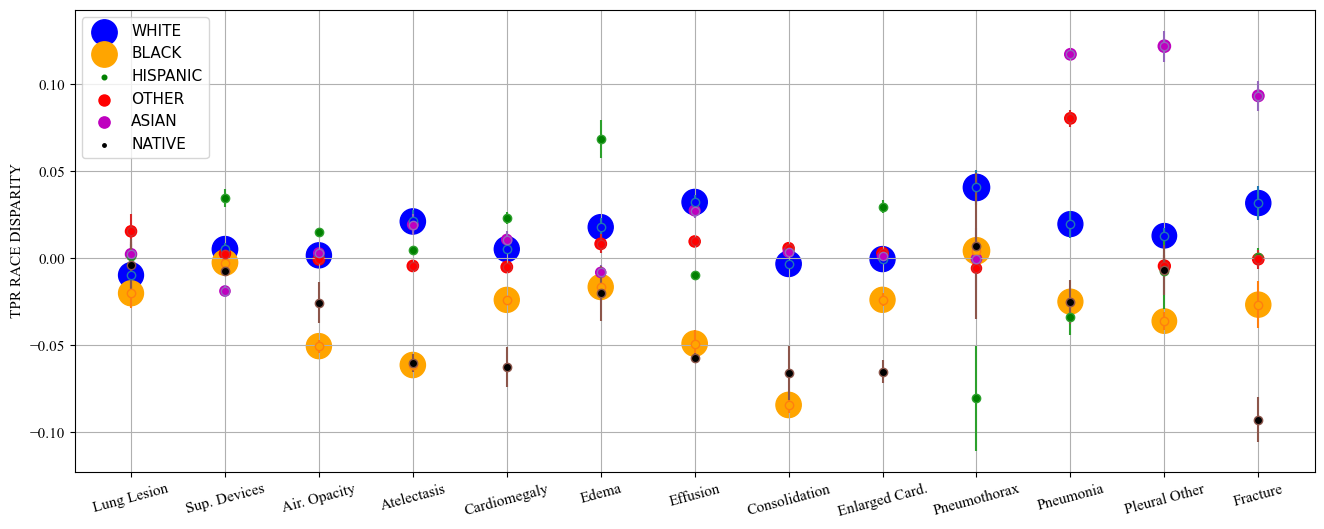

In [42]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_RACE.pdf")